# Stack Overflow Developer Survey

---

## 0 - Introdução 

Nessa análise tentaremos entender as principais tendências da pesquisa realizada anualmente feita pelo Stack Overflow sobre salários dos desenvolvedores. A base pode ser acessada pelo link https://survey.stackoverflow.co.

___

## 1 - Importação das bibliotecas

Para realizar a análise será utilizado as bibliotecas:

- Pandas: Manipulação da base.
- Numpy: Funções matemáticas para facilitar manipulação.
- Matplotlib e Seaborn: Visualização gráfica.

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Definindo estilo do gráfico
plt.style.use("ggplot")

Estabelecendo a conexão com o banco de dados a partir da classe DB.

In [3]:
import sys
sys.path.append('..')
from db.database import DB

db = DB()

---

## 2 - Perguntas de negócio

### 2.1 - Público da pesquisa

#### ***Qual a distribuição do nível educacional?***

Executando a query conectando no banco de dados e retornando o resultado num dataframe.

In [4]:
df_edlevel_grouped = db.query_to_dataframe('SELECT "EdLevel" as nivel_educacional, COUNT("EdLevel") as total FROM survey WHERE "EdLevel" IS NOT NULL GROUP BY "EdLevel" ORDER BY total DESC;')
df_edlevel_grouped

,nivel_educacional,total
0,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",36706
1,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",20543
2,Some college/university study without earning ...,11753
3,"Secondary school (e.g. American high school, G...",8897
4,"Professional degree (JD, MD, Ph.D, Ed.D, etc.)",3887
5,"Associate degree (A.A., A.S., etc.)",2807
6,Primary/elementary school,1905
7,Something else,1475


Plotando o gráfico visualizar a distribuição.

<Axes: title={'center': 'Distribuição por nível educacional'}, xlabel='Total', ylabel='Nivel Educacional'>

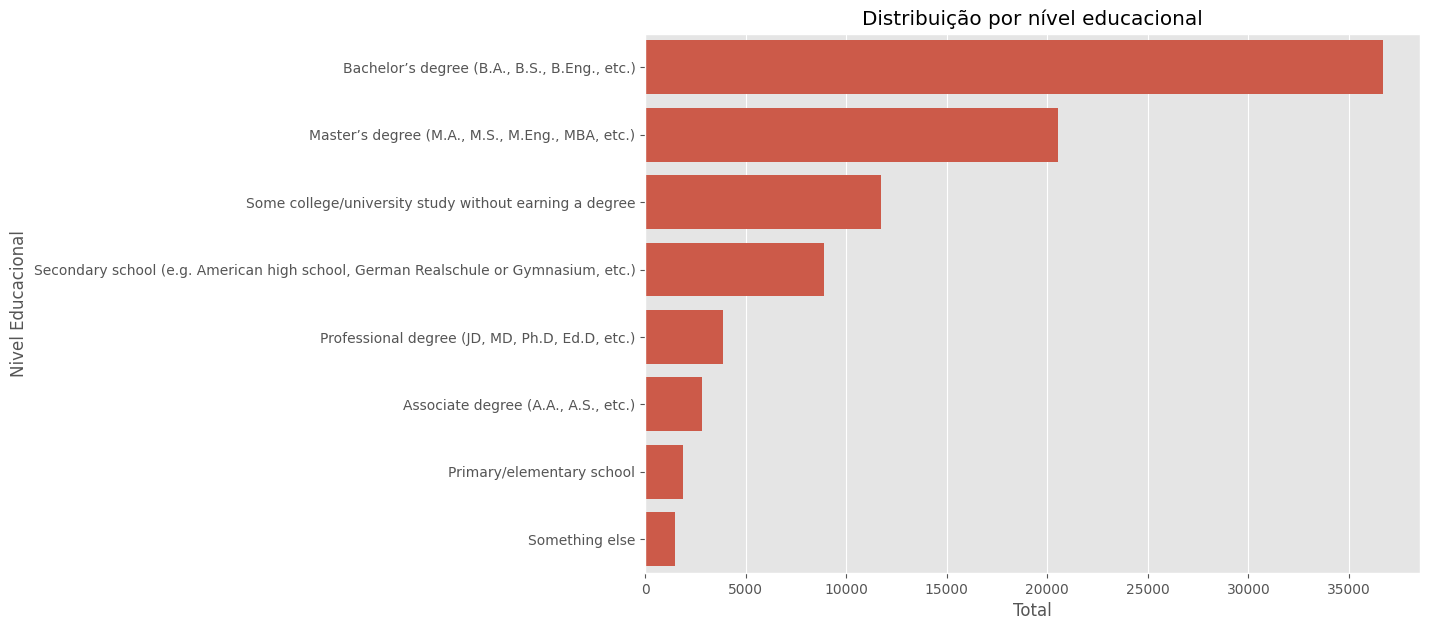

In [5]:
_ = plt.figure(figsize=(10, 7))
_ = plt.title("Distribuição por nível educacional")
_ = plt.xlabel("Total")
_ = plt.ylabel("Nivel Educacional")
sns.barplot(data = df_edlevel_grouped, x = 'total', y = 'nivel_educacional', orient="h")

Gerando a medida da frequência relativa.

In [6]:
df_edlevel_grouped['frequencia_relativa_(%)'] = (df_edlevel_grouped['total'] / df_edlevel_grouped['total'].sum() * 100).round(2)
df_edlevel_grouped

,nivel_educacional,total,frequencia_relativa_(%)
0,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",36706,41.72
1,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",20543,23.35
2,Some college/university study without earning ...,11753,13.36
3,"Secondary school (e.g. American high school, G...",8897,10.11
4,"Professional degree (JD, MD, Ph.D, Ed.D, etc.)",3887,4.42
5,"Associate degree (A.A., A.S., etc.)",2807,3.19
6,Primary/elementary school,1905,2.17
7,Something else,1475,1.68


41,72% dos entrevistados possuem um diploma de bacharel, seguidos por 23,35% possuindo um mestrado.

#### ***Qual a distribuição da idade?***

Executando a query conectando no banco de dados e retornando o resultado num dataframe.

In [7]:
df_age = db.query_to_dataframe('SELECT "Age" as idade, COUNT("Age") as total FROM survey WHERE "Age" IS NOT NULL GROUP BY idade ORDER BY total DESC;')
df_age

,idade,total
0,25-34 years old,33247
1,35-44 years old,20532
2,18-24 years old,17931
3,45-54 years old,8334
4,Under 18 years old,4128
5,55-64 years old,3392
6,65 years or older,1171
7,Prefer not to say,449


Plotando o gráfico visualizar a distribuição.

<Axes: title={'center': 'Distribuição por idade'}, xlabel='Total', ylabel='Idade'>

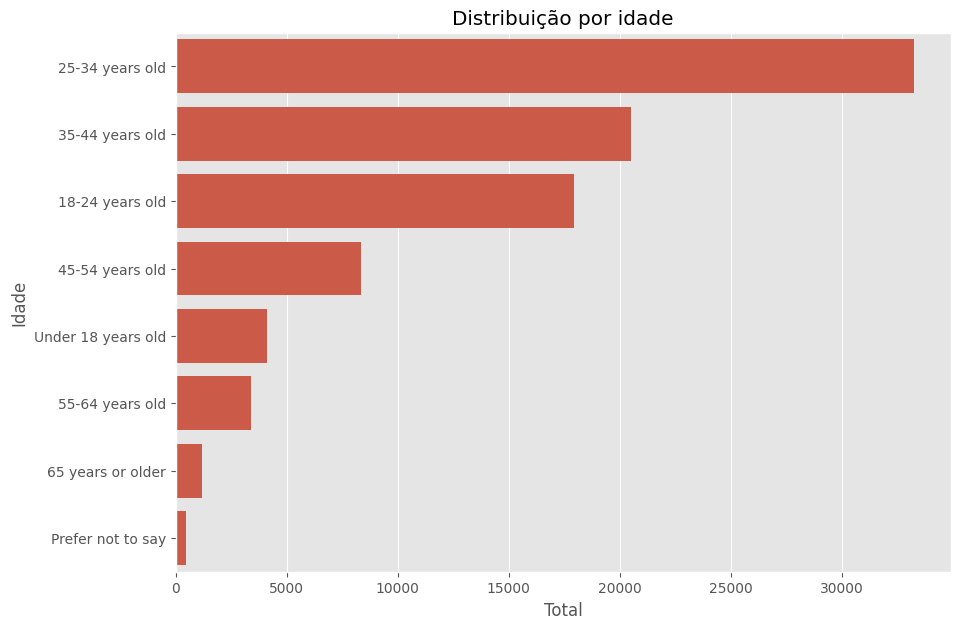

In [8]:
_ = plt.figure(figsize=(10, 7))
_ = plt.title("Distribuição por idade")
_ = plt.xlabel("Total")
_ = plt.ylabel("Idade")
sns.barplot(data = df_age, x = 'total', y = 'idade', orient="h")

Gerando a medida da frequência relativa.

In [9]:
df_age['frequencia_relativa_(%)'] = (df_age['total'] / df_age['total'].sum() * 100).round(2)
df_age

,idade,total,frequencia_relativa_(%)
0,25-34 years old,33247,37.28
1,35-44 years old,20532,23.02
2,18-24 years old,17931,20.11
3,45-54 years old,8334,9.34
4,Under 18 years old,4128,4.63
5,55-64 years old,3392,3.80
6,65 years or older,1171,1.31
7,Prefer not to say,449,0.50


37,28% dos entrevistados estão na faixa etária dos 25 até os 34 anos, 23,02% na faixa etária dos 35 até os 44 anos e 20,11% na faixa dos 18 até os 24 anos.

#### ***Qual a distribuição por status de empregabilidade?***

Filtrando todas as respostas em valores unicos, separando os valores após o ;

In [10]:
df_employment_status = db.query_to_dataframe("""
    SELECT DISTINCT TRIM(value) AS empregabilidade
    FROM (
        SELECT regexp_split_to_table("Employment", ';') AS value
        FROM survey
    ) AS subquery;
""")
df_employment_status

,empregabilidade
0,"Student, full-time"
1,"Not employed, and not looking for work"
2,"Not employed, but looking for work"
3,"Independent contractor, freelancer, or self-em..."
4,"Employed, full-time"
5,"Student, part-time"
6,"Employed, part-time"
7,I prefer not to say
8,Retired


Executando a query conectando no banco de dados e retornando o resultado num dataframe.

In [11]:
empregabilidade_values = df_employment_status['empregabilidade'].tolist()

case_when_clause = ""
for value in empregabilidade_values:
    case_when_clause += f"WHEN \"Employment\" LIKE '%%{value}%%' THEN '{value}'\n"

query = f"""
SELECT 
    CASE 
        {case_when_clause} ELSE 'Other'
    END as empregabilidade,
    COUNT(*) as total
FROM survey 
WHERE "Employment" IS NOT NULL 
GROUP BY empregabilidade 
ORDER BY total DESC;
"""

df_employment_grouped = db.query_to_dataframe(query)
df_employment_grouped

,empregabilidade,total
0,"Employed, full-time",55043
1,"Independent contractor, freelancer, or self-em...",12533
2,"Student, full-time",11768
3,"Not employed, but looking for work",3257
4,"Employed, part-time",1664
5,"Student, part-time",1450
6,"Not employed, and not looking for work",1064
7,Retired,570
8,I prefer not to say,549


Plotando o gráfico visualizar a distribuição.

<Axes: title={'center': 'Distribuição por empregabilidade'}, xlabel='Total', ylabel='Empregabilidade'>

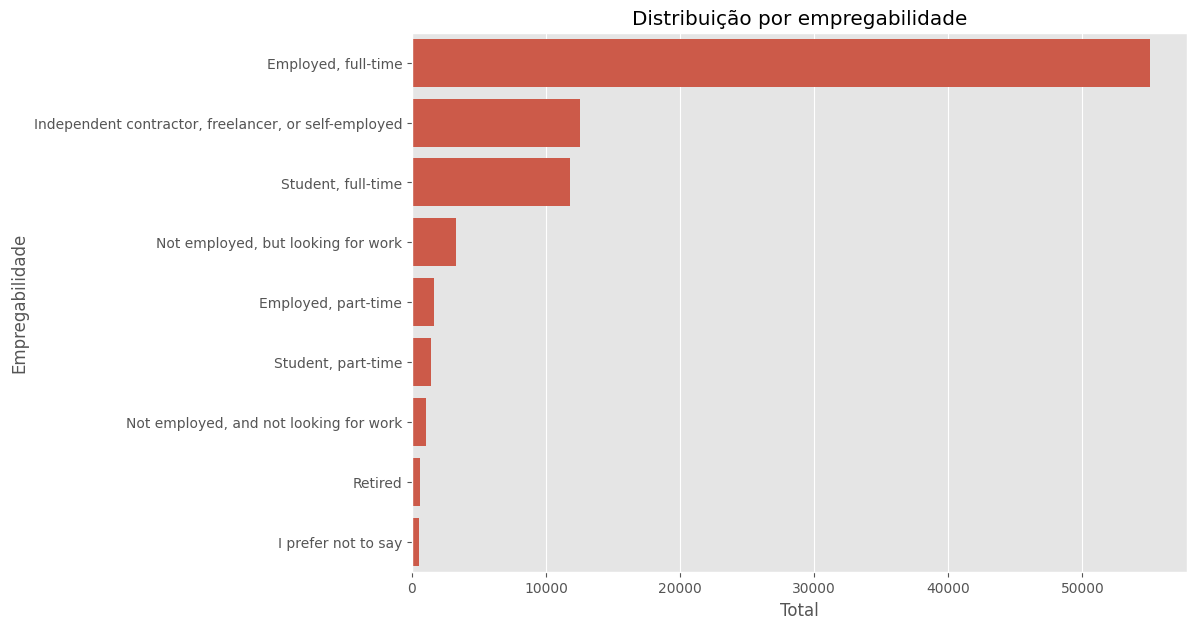

In [17]:
_ = plt.figure(figsize=(10, 7))
_ = plt.title("Distribuição por empregabilidade")
_ = plt.xlabel("Total")
_ = plt.ylabel("Empregabilidade")
sns.barplot(data = df_employment_grouped, x = 'total', y = 'empregabilidade', orient="h")

Gerando a medida da frequência relativa.

In [18]:
df_employment_grouped['frequencia_relativa_(%)'] = (df_employment_grouped['total'] / df_employment_grouped['total'].sum() * 100).round(2)
df_employment_grouped

,empregabilidade,total,frequencia_relativa_(%)
0,"Employed, full-time",55043,62.62
1,"Independent contractor, freelancer, or self-em...",12533,14.26
2,"Student, full-time",11768,13.39
3,"Not employed, but looking for work",3257,3.71
4,"Employed, part-time",1664,1.89
5,"Student, part-time",1450,1.65
6,"Not employed, and not looking for work",1064,1.21
7,Retired,570,0.65
8,I prefer not to say,549,0.62


62,62% dos entrevistados estão empregados e trabalhando uma jornada de trabalho completa, 14,26% como freelancer ou consultores e 13,39% como estudantes em período integral.

#### ***Qual a distribuição por modalidade de emprego?***

Executando a query conectando no banco de dados e retornando o resultado num dataframe.

In [20]:
df_remote_work_groupped = db.query_to_dataframe('SELECT "RemoteWork" as modalidade_emprego, COUNT("RemoteWork") as total FROM survey WHERE "RemoteWork" IS NOT NULL GROUP BY modalidade_emprego ORDER BY total DESC;')
df_remote_work_groupped

,modalidade_emprego,total
0,"Hybrid (some remote, some in-person)",31131
1,Remote,30566
2,In-person,12113


Plotando o gráfico visualizar a distribuição.

<Axes: title={'center': 'Distribuição por modalidade de emprego'}, xlabel='Modalidade de emprego', ylabel='Total'>

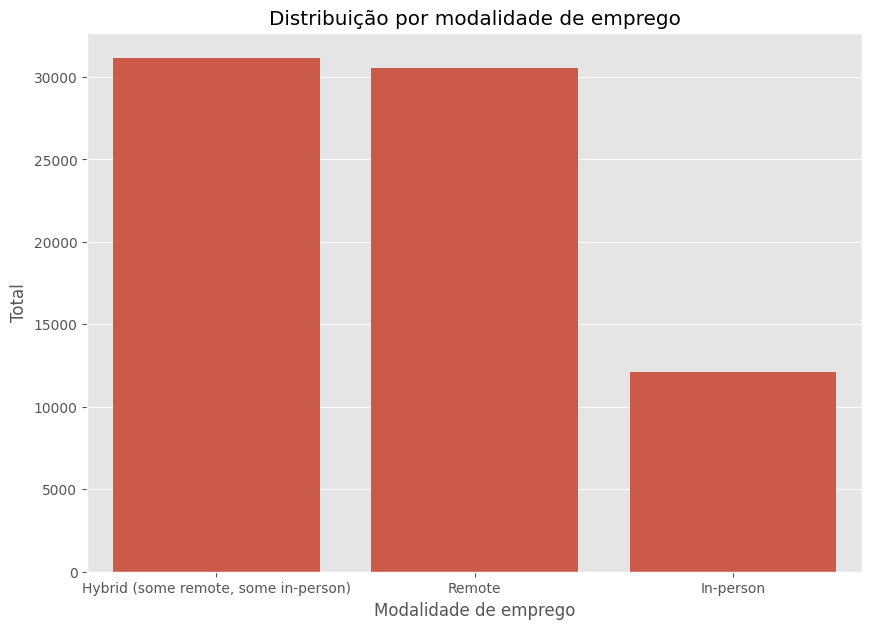

In [22]:
_ = plt.figure(figsize=(10, 7))
_ = plt.title("Distribuição por modalidade de emprego")
_ = plt.xlabel("Modalidade de emprego")
_ = plt.ylabel("Total")
sns.barplot(data = df_remote_work_groupped, x = 'modalidade_emprego', y = 'total')

Gerando a medida da frequência relativa.

In [23]:
df_remote_work_groupped['frequencia_relativa_(%)'] = (df_remote_work_groupped['total'] / df_remote_work_groupped['total'].sum() * 100).round(2)
df_remote_work_groupped

,modalidade_emprego,total,frequencia_relativa_(%)
0,"Hybrid (some remote, some in-person)",31131,42.18
1,Remote,30566,41.41
2,In-person,12113,16.41


42,18% dos entrevistados trabalham no modelo híbrido, 41,41% no modelo remoto e apenas 16,41% no modelo presencial.